<a href="https://colab.research.google.com/github/ratulKabir/MotorAI_ML_challange/blob/master/ChlorineConcentration_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Librabies

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from numpy import array
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
# To use Keras model in Scikit Lear and hyperparameter tuning
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


## 2. Import Data from Google Drive
To read the data from google drice I have used the mount() function. Then given the file path to pandas

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ChlorineConcentration.csv', header=-1)

In [0]:
# Check for missing values
df.isnull().sum().sum()

0

## 3. Split datafame into train, test dataset

In [0]:
X = df.iloc[:, 1:] # X has all the columns except the 1st column (labels)
Y = df.iloc[:, 0] # Labels are stored in Y

In [0]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.asarray(X), np.asarray(Y), test_size = 0.3, shuffle='True')

In [0]:
nrows, ncols = Xtrain.shape
nrows_test, ncols_test = Xtest.shape
Xtrain.shape, Xtest.shape

((2688, 166), (1152, 166))

To fed into Conv1D `Xtrain` and 'Xtest' must have a shape of `[samples, timesteps, features]`. Here In the given dataset there are 2688 samples indicated by the number of rows each with 166 timesteps which is the number of columns. 
As only one value has to predicted per sample, the number of features is 1. <br>
Therefore , `Xtrain` and `Xtest` is rehsaped with an extra dimension.  

In [0]:
# reshape Xtrain and Xtest
Xtrain = Xtrain.reshape(nrows, ncols,1)
Xtest = Xtest.reshape(nrows_test, ncols_test,1)

# check the final shapes [samples, timesteps, features]
Xtrain.shape, Xtest.shape

((2688, 166, 1), (1152, 166, 1))

## 4. Hyperparameter tuning


#### 4.1 Initial model

In [0]:
# define model
def cnn_model():
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(ncols, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
  
  return model

In [0]:
# inintially the model is trained with 100 epochs and 32 batch size
# KerasCLassifier wraps the model
model = KerasClassifier(build_fn=cnn_model, batch_size=32)

epochs = 100
history = model.fit(Xtrain, Ytrain,
          epochs=epochs)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2688/2688 [==============================] - 2s 592us/step - loss: 0.6629 - acc: 0.3304
Epoch 2/100
2688/2688 [==============================] - 1s 329us/step - loss: 0.6282 - acc: 0.3705
Epoch 3/100
2688/2688 [==============================] - 1s 333us/step - loss: 0.5671 - acc: 0.3661
Epoch 4/100
2688/2688 [==============================] - 1s 336us/step - loss: 0.5606 - acc: 0.3839
Epoch 5/100
2688/2688 [==============================] - 1s 337us/step - loss: 0.5702 - acc: 0.4036
Epoch 6/100
2688/2688 [==============================] - 1s 343us/step - loss: 0.5436 - acc: 0.4055
Epoch 7/100
2688/2688 [==============================] - 1s 333us/step - loss: 0.5343 - acc: 0.4010
Epoch 8/100
2688/2688 [==============================] - 1s 330us/step - loss: 0.4965 - acc: 0.4282
Epoch 9/100
2688/2688 [==============================] - 1s 333us/step - loss: 0

## GridSearchCV

#### 4.2 Batch size, epochs

In [0]:
model = KerasClassifier(build_fn=cnn_model)

batch_sizes = [16, 32, 64, 128] # different batch sizes and epochs are tested to 
epochs = [80, 100]              # understand which one is the best for the dataset

parameters = {'batch_size': batch_sizes, 'epochs': epochs}
clf = GridSearchCV(model, parameters)
clf.fit(Xtrain, Ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/80
1792/1792 [==============================] - 3s 2ms/step - loss: 0.7211 - acc: 0.3488
Epoch 2/80
1792/1792 [==============================] - 1s 652us/step - loss: 0.6233 - acc: 0.3493
Epoch 3/80
1792/1792 [==============================] - 1s 647us/step - loss: 0.6275 - acc: 0.3633
Epoch 4/80
1792/1792 [==============================] - 1s 628us/step - loss: 0.5783 - acc: 0.3694
Epoch 5/80
1792/1792 [==============================] - 1s 614us/step - loss: 0.5725 - acc: 0.3845
Epoch 6/80
1792/1792 [==============================] - 1s 618us/step - loss: 0.5530 - acc: 0.3823
Epoch 7/80
1792/1792 [==============================] - 1s 621us/step - loss: 0.5254 - acc: 0.4141
Epoch 8/80
1792/1792 [==============================] - 1s 627us/step - loss: 0.5327 - acc: 0.4375
Epoch 9/80
1792/1792 [==============================] - 1s 589us/step - loss: 0.5135 - acc: 0.4230
Epoch 10/80
1792/1792 [==============================] - 1s 615us/step - loss: 0.5009 - acc: 0.4353
Epoch 11/80

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7f33308898>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'batch_size': [16, 32, 64, 128], 'epochs': [80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score'] # 'mean_test_score' is used to compare all the combinations
parameters = clf.cv_results_['params']     # 'params' is the parameters, batch-size and epochs 
for mean, parameter in zip (means, parameters):
  print(mean, parameter)

0.8433779761904762 {'batch_size': 16, 'epochs': 100}
0.8072916666666666 {'batch_size': 16, 'epochs': 80}
0.8433779761904762 {'batch_size': 16, 'epochs': 100}
0.7142857142857143 {'batch_size': 32, 'epochs': 80}
0.7295386904761905 {'batch_size': 32, 'epochs': 100}
0.5892857142857143 {'batch_size': 64, 'epochs': 80}
0.7388392857142857 {'batch_size': 64, 'epochs': 100}
0.6242559523809523 {'batch_size': 128, 'epochs': 80}
0.5948660714285714 {'batch_size': 128, 'epochs': 100}


#### 4.3 Optimizer

In [0]:
# define model
def cnn_model(optimizer):
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(ncols, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
  
  return model

model = KerasClassifier(build_fn=cnn_model, epochs=100, batch_size=16)
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
parameters = {'optimizer':optimizers}
clf = GridSearchCV(model, parameters)
clf.fit(Xtrain, Ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/100
1792/1792 [==============================] - 5s 3ms/step - loss: 0.6984 - acc: 0.2807
Epoch 2/100
1792/1792 [==============================] - 1s 564us/step - loss: 0.6666 - acc: 0.3019
Epoch 3/100
1792/1792 [==============================] - 1s 560us/step - loss: 0.6523 - acc: 0.2946
Epoch 4/100
1792/1792 [==============================] - 1s 556us/step - loss: 0.6446 - acc: 0.2885
Epoch 5/100
1792/1792 [==============================] - 1s 577us/step - loss: 0.6422 - acc: 0.2824
Epoch 6/100
1792/1792 [==============================] - 1s 596us/step - loss: 0.6361 - acc: 0.2935
Epoch 7/100
1792/1792 [==============================] - 1s 647us/step - loss: 0.6355 - acc: 0.2868
Epoch 8/100
1792/1792 [==============================] - 1s 635us/step - loss: 0.6231 - acc: 0.2985
Epoch 9/100
1792/1792 [==============================] - 1s 635us/step - loss: 0.6215 - acc: 0.2874
Epoch 10/100
1792/1792 [==============================] - 1s 637us/step - loss: 0.6068 - acc: 0.3108
E

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7f2b868978>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9464285714285714 {'optimizer': 'Nadam'}
0.6644345238095238 {'optimizer': 'SGD'}
0.8898809523809523 {'optimizer': 'RMSprop'}
0.5859375 {'optimizer': 'Adagrad'}
0.7049851190476191 {'optimizer': 'Adadelta'}
0.8697916666666666 {'optimizer': 'Adam'}
0.7671130952380952 {'optimizer': 'Adamax'}
0.9464285714285714 {'optimizer': 'Nadam'}


## 5. Final model

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(ncols, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Nadam', loss='mse', metrics=['accuracy']) # optimizer='Nadam'
 
history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=16) # epochs=100, batch_size=16

Epoch 1/100
2688/2688 [==============================] - 7s 3ms/step - loss: 0.7385 - acc: 0.3341
Epoch 2/100
2688/2688 [==============================] - 2s 800us/step - loss: 0.6203 - acc: 0.3594
Epoch 3/100
2688/2688 [==============================] - 2s 808us/step - loss: 0.5976 - acc: 0.3672
Epoch 4/100
2688/2688 [==============================] - 2s 813us/step - loss: 0.5694 - acc: 0.3951
Epoch 5/100
2688/2688 [==============================] - 2s 803us/step - loss: 0.5482 - acc: 0.4070
Epoch 6/100
2688/2688 [==============================] - 2s 813us/step - loss: 0.5390 - acc: 0.4308
Epoch 7/100
2688/2688 [==============================] - 2s 813us/step - loss: 0.5165 - acc: 0.4308
Epoch 8/100
2688/2688 [==============================] - 2s 813us/step - loss: 0.5068 - acc: 0.4427
Epoch 9/100
2688/2688 [==============================] - 2s 809us/step - loss: 0.4764 - acc: 0.4866
Epoch 10/100
2688/2688 [==============================] - 2s 805us/step - loss: 0.4744 - acc: 0.4747
E

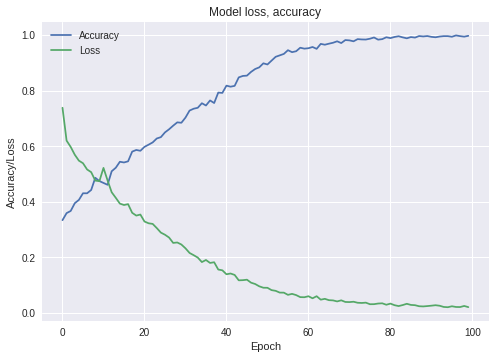

In [0]:
# Plot accuracy and loss values
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model loss, accuracy')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()


In [0]:
# Score and accuracy of the model on test set
score, acc = model.evaluate(Xtest, Ytest)
score, acc

1152/1152 [==============================] - 2s 2ms/step


(0.03503206025602089, 0.9904513888888888)

The final test accuracy is 99%